<a href="https://colab.research.google.com/github/pszwed-ai/cpp/blob/main/Intersections3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

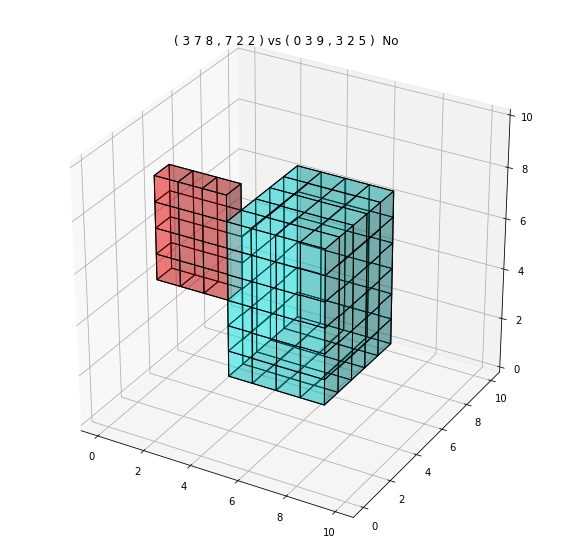

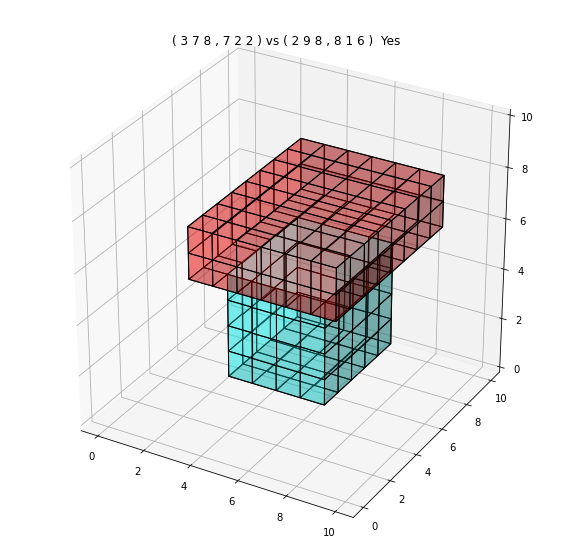

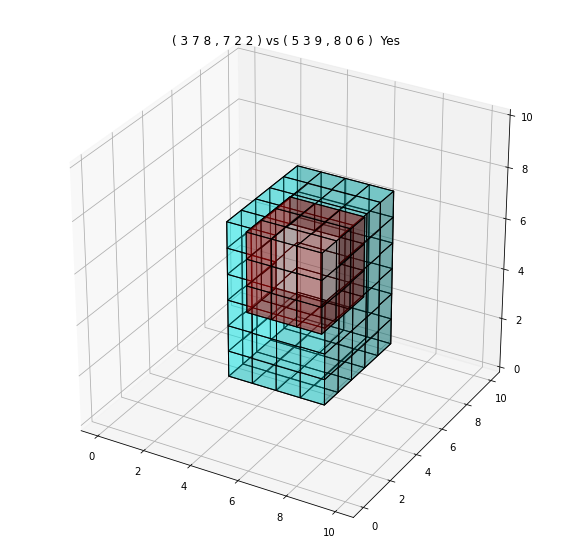

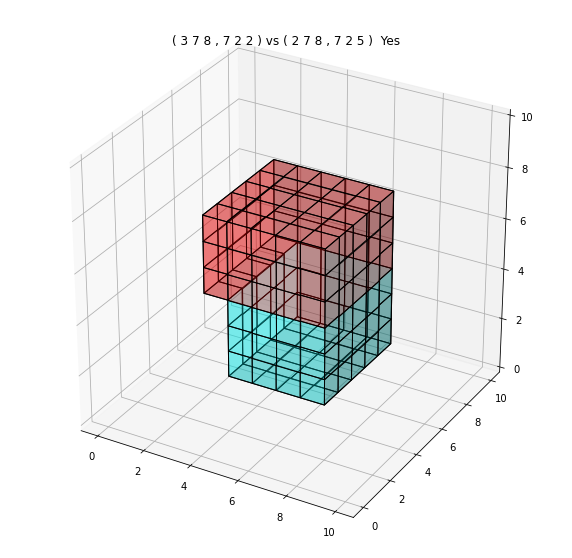

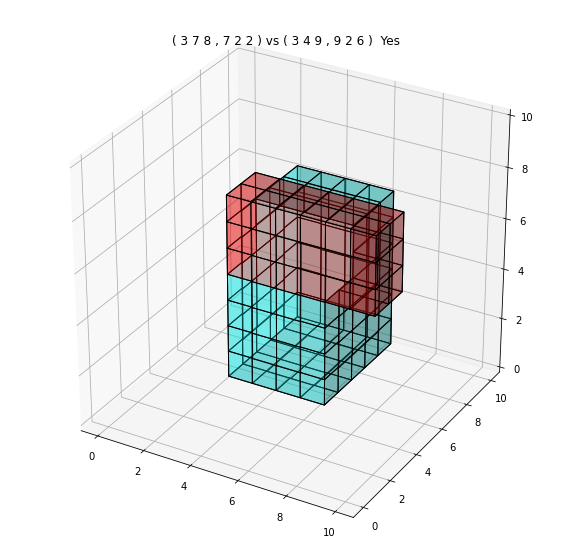

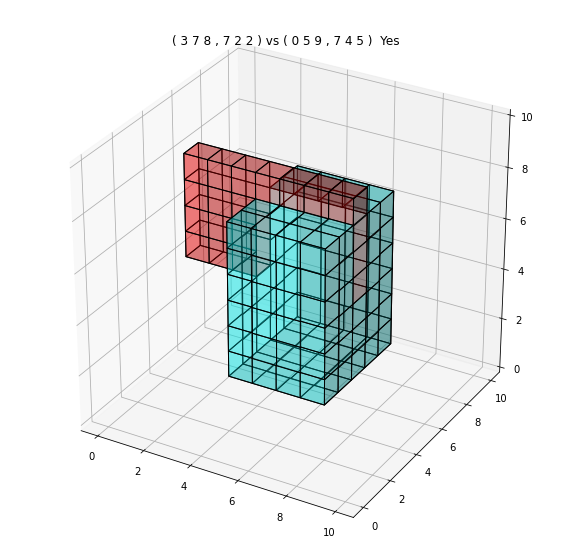

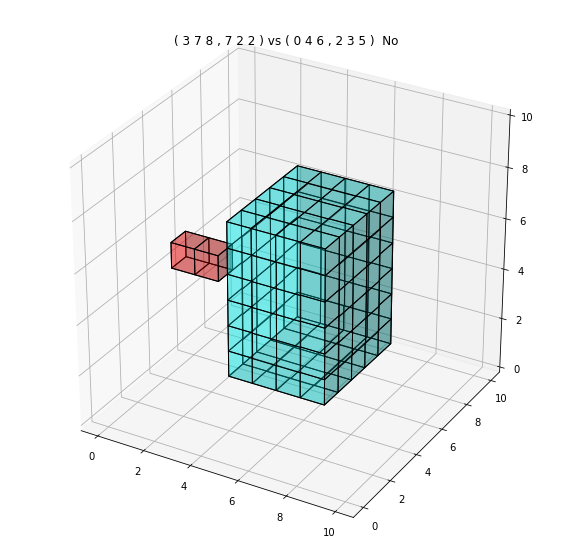

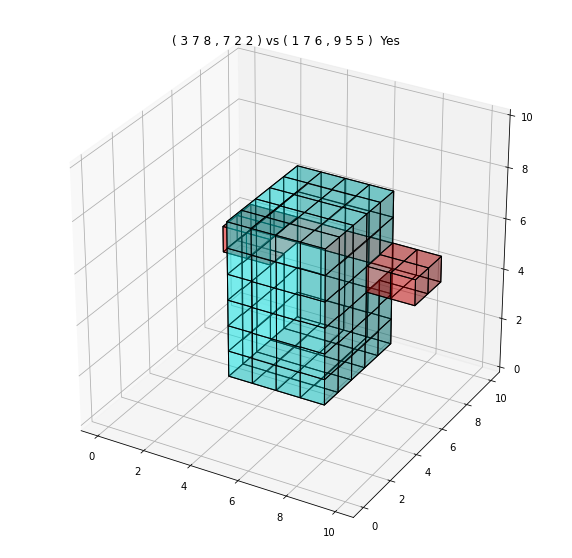

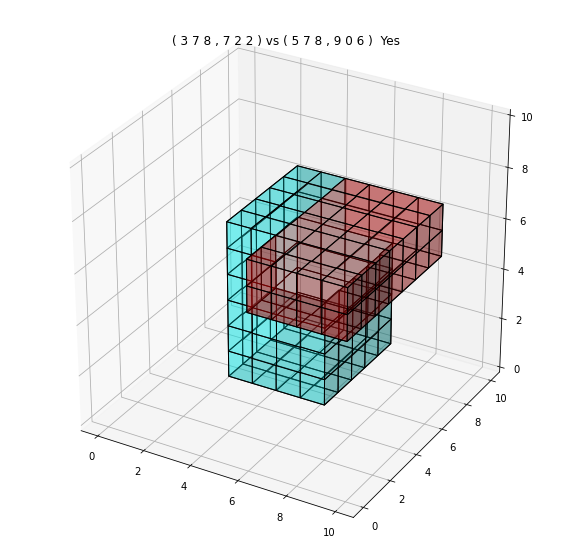

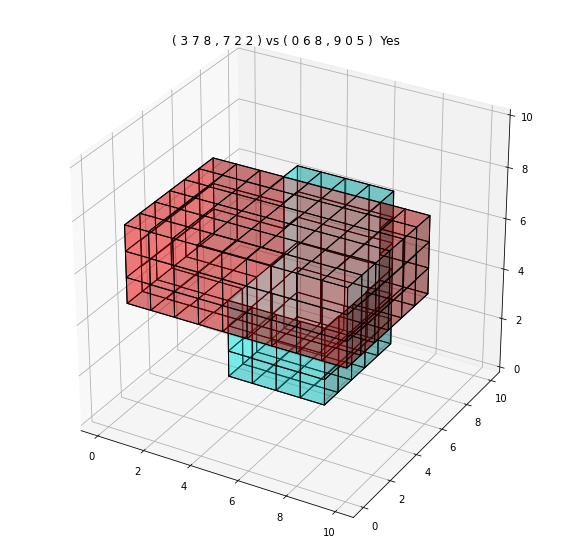

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import re

plt.rcParams["figure.figsize"] = (10,10)

def unpack(c1):
  c1=re.sub('\(','',c1)
  c1=re.sub('\)','',c1)
  c1=re.sub(',','',c1)
  c1=c1.split()
  x1=int(c1[0])
  y1=int(c1[1]) 
  z1=int(c1[2])
  x2=int(c1[3])
  y2=int(c1[4]) 
  z2=int(c1[5])
  return x1,y1,z1,x2,y2,z2

def plot_boxes(c1,c2,intersects=''):
  # prepare some coordinates
  x, y, z = np.indices((10, 10, 10))

  # draw cuboids in the top left and bottom right corners, and a link between
  # them
  x1,y1,z1,x2,y2,z2 = unpack(c1)
  cube1 = (x > x1) & (x<=x2) & (y < y1) & (y >= y2 ) & (z < z1) & (z>=z2)

  x1,y1,z1,x2,y2,z2 = unpack(c2)
  cube2 = (x > x1) & (x<=x2) & (y < y1) & (y >= y2 ) & (z < z1) & (z>=z2)

  # combine the objects into a single boolean array
  voxels = cube1 | cube2

  # set the colors of each object
  colors = np.empty(voxels.shape, dtype=object)
  colors[cube1] = 'cyan'
  colors[cube2] = 'red'

  # and plot everything
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  ax.voxels(voxels, facecolors=colors, edgecolor='k',alpha=0.3)
  plt.title(f'{c1} vs {c2} {intersects}')
  plt.show()


c1='( 3 7 8 , 7 2 2 )'


boxes = """( 0 3 9 , 3 2 5 ) 0
( 2 9 8 , 8 1 6 ) 1
( 5 3 9 , 8 0 6 ) 1
( 2 7 8 , 7 2 5 ) 1
( 3 4 9 , 9 2 6 ) 1
( 0 5 9 , 7 4 5 ) 1
( 0 4 6 , 2 3 5 ) 0
( 1 7 6 , 9 5 5 ) 1
( 5 7 8 , 9 0 6 ) 1
( 0 6 8 , 9 0 5 ) 1
"""
for c2 in boxes.splitlines():
  intersects='No'
  if c2[-1]=='1':
    intersects='Yes'
  c2=c2[:-1]  
  plot_boxes(c1,c2,intersects)

